In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/international-hotel-booking-analytics/users.csv
/kaggle/input/international-hotel-booking-analytics/booking_db.sqlite
/kaggle/input/international-hotel-booking-analytics/reviews.csv
/kaggle/input/international-hotel-booking-analytics/hotels.csv


In [2]:
# Begin loading all data

print("Loading International Hotel Booking Data...")

# Check all CSV files have been read and loaded successfully

hotels_df = pd.read_csv('/kaggle/input/international-hotel-booking-analytics/hotels.csv')
users_df = pd.read_csv('/kaggle/input/international-hotel-booking-analytics/users.csv')
reviews_df = pd.read_csv('/kaggle/input/international-hotel-booking-analytics/reviews.csv')

# Connect to SQLite database for verification
conn = sqlite3.connect('booking_db.sqlite')

print("✅ Data loaded successfully!")
print(f"🏨 Hotels: {len(hotels_df)} records")
print(f"👥 Users: {len(users_df)} records") 
print(f"⭐ Reviews: {len(reviews_df)} records")
print(f"📅 Date range: {reviews_df['review_date'].min()} to {reviews_df['review_date'].max()}")

Loading International Hotel Booking Data...
✅ Data loaded successfully!
🏨 Hotels: 25 records
👥 Users: 2000 records
⭐ Reviews: 50000 records
📅 Date range: 2020-01-01 to 2025-12-31


## **EXPLORATORY DATA ANALYSIS**

### **Hotels Data Synopsis**

In [3]:
print("HOTELS DATASET SUMMARY")
print("=" * 50)

hotels_df.info()

HOTELS DATASET SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hotel_id              25 non-null     int64  
 1   hotel_name            25 non-null     object 
 2   city                  25 non-null     object 
 3   country               25 non-null     object 
 4   star_rating           25 non-null     int64  
 5   lat                   25 non-null     float64
 6   lon                   25 non-null     float64
 7   cleanliness_base      25 non-null     float64
 8   comfort_base          25 non-null     float64
 9   facilities_base       25 non-null     float64
 10  location_base         25 non-null     float64
 11  staff_base            25 non-null     float64
 12  value_for_money_base  25 non-null     float64
dtypes: float64(8), int64(2), object(3)
memory usage: 2.7+ KB


In [4]:
hotels_df.shape

(25, 13)

In [5]:
print("HOTELS DATASET SNAPSHOT")
print("=" * 50)

hotels_df.head(n=5)

HOTELS DATASET SNAPSHOT


,hotel_id,hotel_name,city,country,star_rating,lat,lon,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
0,1,The Azure Tower,New York,United States,5,40.7580,-73.9855,9.1,8.8,8.9,9.5,8.6,8.0
1,2,The Royal Compass,London,United Kingdom,5,51.5072,-0.1276,9.0,9.2,8.8,9.4,9.0,7.9
2,3,L'Étoile Palace,Paris,France,5,48.8566,2.3522,8.8,9.4,8.7,9.6,9.3,8.1
3,4,Kyo-to Grand,Tokyo,Japan,5,35.6895,139.6917,9.6,9.0,9.3,8.5,9.5,8.2
4,5,The Golden Oasis,Dubai,United Arab Emirates,5,25.2769,55.2962,9.3,9.5,9.6,8.9,9.4,8.5


In [6]:
key_hotel_metrics = ['star_rating', 'cleanliness_base', 'comfort_base', 'facilities_base', 'location_base', 'staff_base', 'value_for_money_base']

print("KEY METRICS SUMMARY")
print("=" * 50)

hotels_df[key_hotel_metrics].describe()

KEY METRICS SUMMARY


,star_rating,cleanliness_base,comfort_base,facilities_base,location_base,staff_base,value_for_money_base
count,25.0,25.000000,25.000000,25.00000,25.00000,25.00000,25.000000
mean,5.0,9.092000,9.064000,8.91600,9.27200,9.01600,8.512000
std,0.0,0.230796,0.237837,0.29109,0.35534,0.24097,0.265079
min,5.0,8.700000,8.600000,8.50000,8.50000,8.60000,7.900000
25%,5.0,8.900000,8.900000,8.70000,9.00000,8.80000,8.400000
50%,5.0,9.100000,9.100000,8.90000,9.30000,9.00000,8.500000
75%,5.0,9.300000,9.200000,9.10000,9.60000,9.20000,8.700000
max,5.0,9.600000,9.500000,9.60000,9.80000,9.50000,8.900000


### **Reviews Data Synopsis**

In [7]:
print("REVIEWS DATASET SUMMARY")
print("=" * 50)

reviews_df.info()

REVIEWS DATASET SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   review_id              50000 non-null  int64  
 1   user_id                50000 non-null  int64  
 2   hotel_id               50000 non-null  int64  
 3   review_date            50000 non-null  object 
 4   score_overall          50000 non-null  float64
 5   score_cleanliness      50000 non-null  float64
 6   score_comfort          50000 non-null  float64
 7   score_facilities       50000 non-null  float64
 8   score_location         50000 non-null  float64
 9   score_staff            50000 non-null  float64
 10  score_value_for_money  50000 non-null  float64
 11  review_text            50000 non-null  object 
dtypes: float64(7), int64(3), object(2)
memory usage: 4.6+ MB


In [8]:
reviews_df.shape

(50000, 12)

In [9]:
print("REVIEWS DATASET SNAPSHOT")
print("=" * 50)

reviews_df.head(n=5)

REVIEWS DATASET SNAPSHOT


,review_id,user_id,hotel_id,review_date,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money,review_text
0,1,1600,1,2022-10-07,8.7,8.6,8.7,8.5,9.0,8.8,8.7,Practice reduce young our because machine. Rec...
1,2,432,4,2020-03-24,9.1,10.0,9.1,9.0,8.6,9.4,8.6,Test cover traditional black. Process tell Mr ...
2,3,186,18,2023-12-18,8.8,9.7,8.8,8.3,8.7,8.1,8.6,Friend million student social study yeah. Grow...
3,4,1403,19,2022-06-22,8.9,9.0,8.8,8.5,9.6,9.1,8.3,Huge girl already remain truth behind card. Ap...
4,5,1723,17,2022-07-02,9.1,8.9,9.5,9.3,8.3,9.4,8.9,Cover feeling call community serve television ...


In [10]:
key_reviews_metrics = ['score_overall', 'score_cleanliness', 'score_comfort', 'score_facilities', 'score_location', 'score_staff', 'score_value_for_money']

print("KEY METRICS SUMMARY")
print("=" * 50)

reviews_df[key_reviews_metrics].describe()

KEY METRICS SUMMARY


,score_overall,score_cleanliness,score_comfort,score_facilities,score_location,score_staff,score_value_for_money
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,8.943460,9.052558,9.024404,8.743062,9.176410,8.972076,8.434540
std,0.180878,0.504296,0.423927,0.498320,0.421086,0.397775,0.529321
min,8.200000,7.700000,7.900000,7.600000,7.900000,7.900000,6.800000
25%,8.800000,8.700000,8.700000,8.400000,8.900000,8.700000,8.100000
50%,8.900000,9.100000,9.000000,8.700000,9.200000,9.000000,8.500000
75%,9.100000,9.400000,9.300000,9.100000,9.500000,9.200000,8.800000
max,9.600000,10.000000,10.000000,10.000000,10.000000,10.000000,9.700000


In [11]:
# convert review_date object to datetime values

reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'])

In [12]:
print("TEMPORAL ANALYSIS")
print("=" * 50)

reviews_df['year'] = reviews_df['review_date'].dt.year


print("Total Reviews Annually:")
reviews_df['year'].value_counts().sort_index()

TEMPORAL ANALYSIS
Total Reviews Annually:


year
2020    8403
2021    8357
2022    8325
2023    8257
2024    8295
2025    8363
Name: count, dtype: int64

In [13]:
reviews_df['month'] = reviews_df['review_date'].dt.month
print("=" * 50)
print("Total Reviews Monthly:")
reviews_df['month'].value_counts().sort_index()


Total Reviews Monthly:


month
1     3115
2     3030
3     3898
4     4491
5     4988
6     6055
7     6071
8     4947
9     3992
10    3401
11    2563
12    3449
Name: count, dtype: int64

In [14]:
print("MOST REVIEWED HOTELS")
print("=" * 50)


MOST REVIEWED HOTELS


In [15]:
print("HOTEL WITH MOST REVIEWS")

reviews_df['hotel_id'].value_counts().max()

HOTEL WITH MOST REVIEWS


2104

In [16]:
print("10 MOST REVIEWED HOTELS")
print("=" * 50)
reviews_df['hotel_id'].value_counts().nlargest(10)

10 MOST REVIEWED HOTELS


hotel_id
18    2104
16    2071
25    2060
20    2055
24    2049
11    2040
19    2039
5     2035
9     2022
6     2015
Name: count, dtype: int64

In [17]:
print("HOTEL WITH LEAST REVIEWS")

reviews_df['hotel_id'].value_counts().min()

HOTEL WITH LEAST REVIEWS


1902

In [18]:
print("10 LEAST REVIEWED HOTELS")
print("=" * 50)
reviews_df['hotel_id'].value_counts().nsmallest(10)

10 LEAST REVIEWED HOTELS


hotel_id
2     1902
21    1948
22    1949
7     1954
23    1956
8     1962
10    1964
17    1970
14    1971
4     1971
Name: count, dtype: int64

In [19]:
print("MOST AND LEAST ACTIVE REVIEWERS")
print("=" * 50)


MOST AND LEAST ACTIVE REVIEWERS


In [20]:
print("USER WITH MOST REVIEWS")

reviews_df['user_id'].value_counts().max()


USER WITH MOST REVIEWS


44

In [21]:
print("TOP 10 REVIEWERS")
print("=" * 50)
reviews_df['user_id'].value_counts().head(n=10)


TOP 10 REVIEWERS


user_id
1760    44
597     44
1544    42
68      42
1141    41
1218    40
1114    40
1073    40
1818    40
1131    39
Name: count, dtype: int64

In [22]:
print("USER WITH LEAST REVIEWS")

reviews_df['user_id'].value_counts().min()

USER WITH LEAST REVIEWS


11

In [23]:
print("BOTTOM 10 REVIEWERS")
print("=" * 50)
reviews_df['user_id'].value_counts().nsmallest(10)


BOTTOM 10 REVIEWERS


user_id
1294    11
909     12
1169    12
1926    12
857     12
1071    13
1596    13
1765    13
884     13
75      13
Name: count, dtype: int64

### **Users Data Synopsis**

In [24]:
print("USERS DATASET SUMMARY")
print("=" * 50)

users_df.info()

USERS DATASET SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         2000 non-null   int64 
 1   user_gender     2000 non-null   object
 2   country         2000 non-null   object
 3   age_group       2000 non-null   object
 4   traveller_type  2000 non-null   object
 5   join_date       2000 non-null   object
dtypes: int64(1), object(5)
memory usage: 93.9+ KB


In [25]:
users_df.shape

(2000, 6)

In [26]:
print("USERS DATASET SNAPSHOT")
print("=" * 50)

users_df.head(n=5)

USERS DATASET SNAPSHOT


,user_id,user_gender,country,age_group,traveller_type,join_date
0,1,Female,United Kingdom,35-44,Solo,2024-09-29
1,2,Male,United Kingdom,25-34,Solo,2023-11-29
2,3,Female,Mexico,25-34,Family,2022-04-03
3,4,Male,India,35-44,Family,2023-12-02
4,5,Other,Japan,25-34,Solo,2021-12-18


In [27]:
print("DEMOGRAPHIC ANALYSIS")
print("=" * 50)

DEMOGRAPHIC ANALYSIS


In [28]:
print("USERS BY GENDER")
users_df['user_gender'].value_counts()

USERS BY GENDER


user_gender
Male      942
Female    864
Other     194
Name: count, dtype: int64

In [29]:
print(f"Percentage: {users_df['user_gender'].value_counts(normalize=True)*100}")

Percentage: user_gender
Male      47.1
Female    43.2
Other      9.7
Name: proportion, dtype: float64


In [30]:
print("USERS BY AGE GROUP")
users_df['age_group'].value_counts()

USERS BY AGE GROUP


age_group
25-34    653
35-44    611
45-54    317
18-24    218
55+      201
Name: count, dtype: int64

In [31]:
print(f"Percentage: {users_df['age_group'].value_counts(normalize=True)*100}")

Percentage: age_group
25-34    32.65
35-44    30.55
45-54    15.85
18-24    10.90
55+      10.05
Name: proportion, dtype: float64


In [32]:
print("USERS BY NATION")
users_df['country'].value_counts()

USERS BY NATION


country
United States           280
United Kingdom          231
Germany                 156
China                   155
France                  134
Japan                   105
Brazil                   98
Canada                   95
Australia                69
Spain                    68
South Korea              63
India                    61
United Arab Emirates     60
Russia                   56
Italy                    51
Mexico                   47
New Zealand              47
Turkey                   39
Argentina                37
Thailand                 36
Netherlands              35
South Africa             29
Nigeria                  19
Egypt                    15
Singapore                14
Name: count, dtype: int64

In [33]:
print(f"Percentage: {users_df['country'].value_counts(normalize=True)*100}")

Percentage: country
United States           14.00
United Kingdom          11.55
Germany                  7.80
China                    7.75
France                   6.70
Japan                    5.25
Brazil                   4.90
Canada                   4.75
Australia                3.45
Spain                    3.40
South Korea              3.15
India                    3.05
United Arab Emirates     3.00
Russia                   2.80
Italy                    2.55
Mexico                   2.35
New Zealand              2.35
Turkey                   1.95
Argentina                1.85
Thailand                 1.80
Netherlands              1.75
South Africa             1.45
Nigeria                  0.95
Egypt                    0.75
Singapore                0.70
Name: proportion, dtype: float64


In [34]:
print("USERS BY TRAVELLER TYPE")
users_df['traveller_type'].value_counts()

USERS BY TRAVELLER TYPE


traveller_type
Couple      694
Family      478
Solo        420
Business    408
Name: count, dtype: int64

In [35]:
print(f"Percentage: {users_df['traveller_type'].value_counts(normalize=True)*100}")

Percentage: traveller_type
Couple      34.7
Family      23.9
Solo        21.0
Business    20.4
Name: proportion, dtype: float64


## **DISTRIBUTIONS OF FACTORS**

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
hotels_df.columns.tolist()

['hotel_id',
 'hotel_name',
 'city',
 'country',
 'star_rating',
 'lat',
 'lon',
 'cleanliness_base',
 'comfort_base',
 'facilities_base',
 'location_base',
 'staff_base',
 'value_for_money_base']

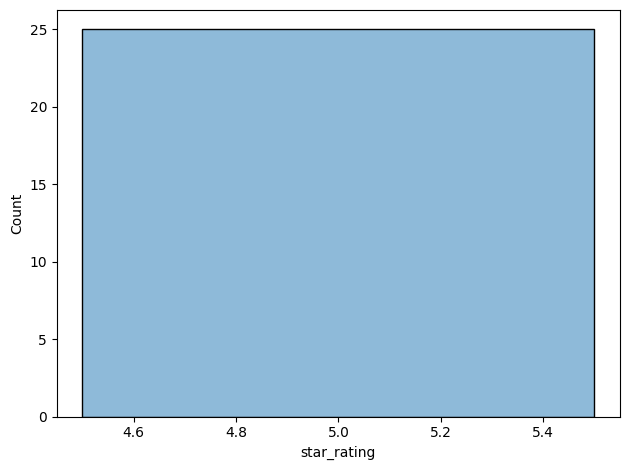

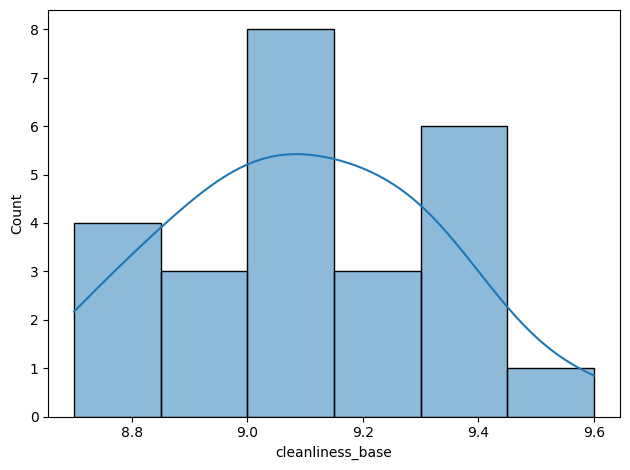

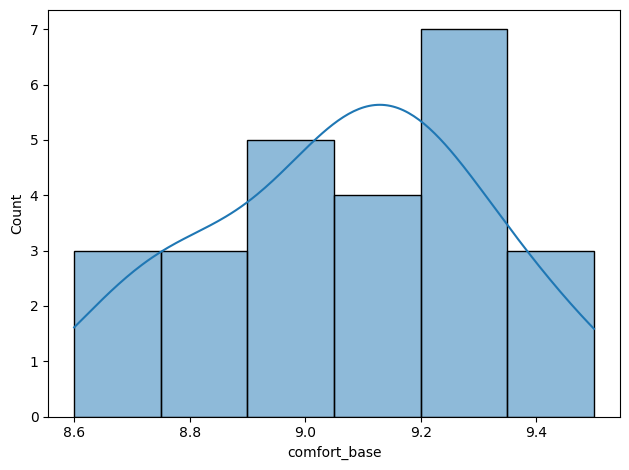

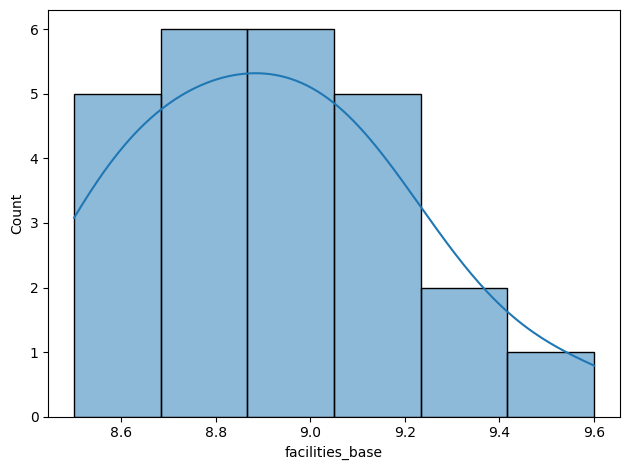

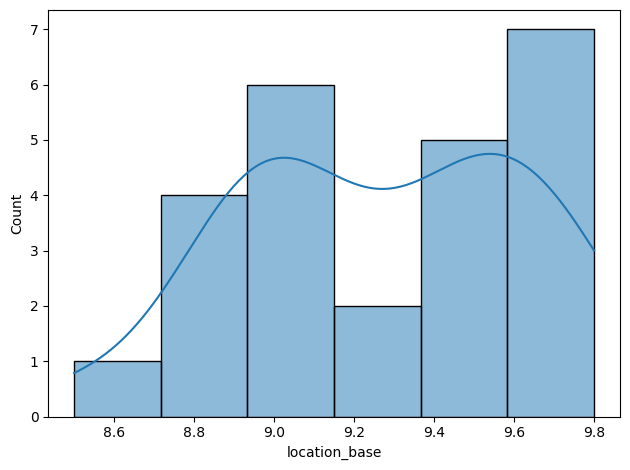

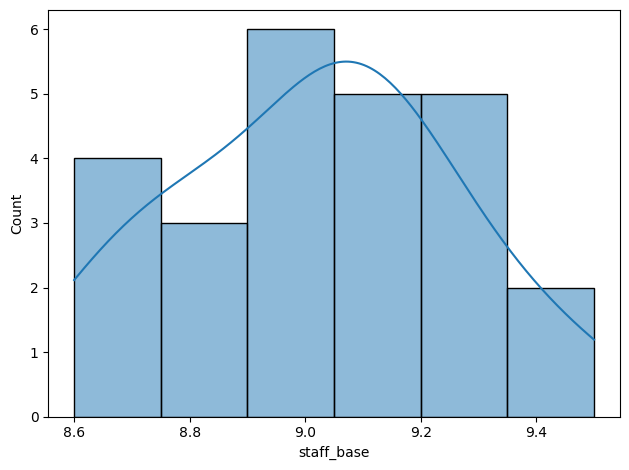

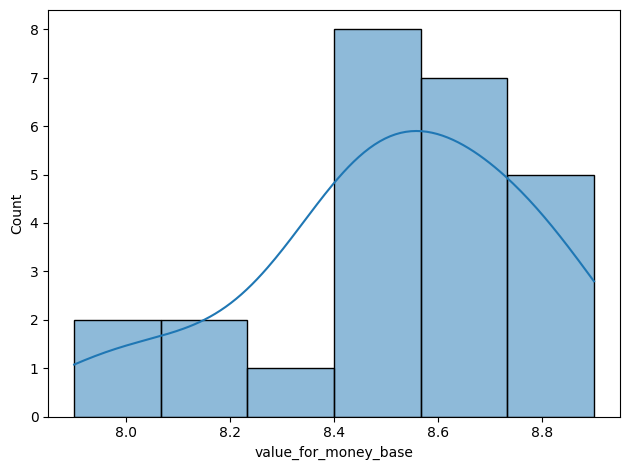

In [38]:
# Select columns explicitly by using indexing technique

selected_columns = hotels_df.iloc[:, [4, 7, 8, 9, 10, 11, 12]]

for cols in selected_columns:
    sns.histplot(x=cols, data=hotels_df, kde=True)
    plt.tight_layout()
    plt.show()

## **CORRELATIONS**

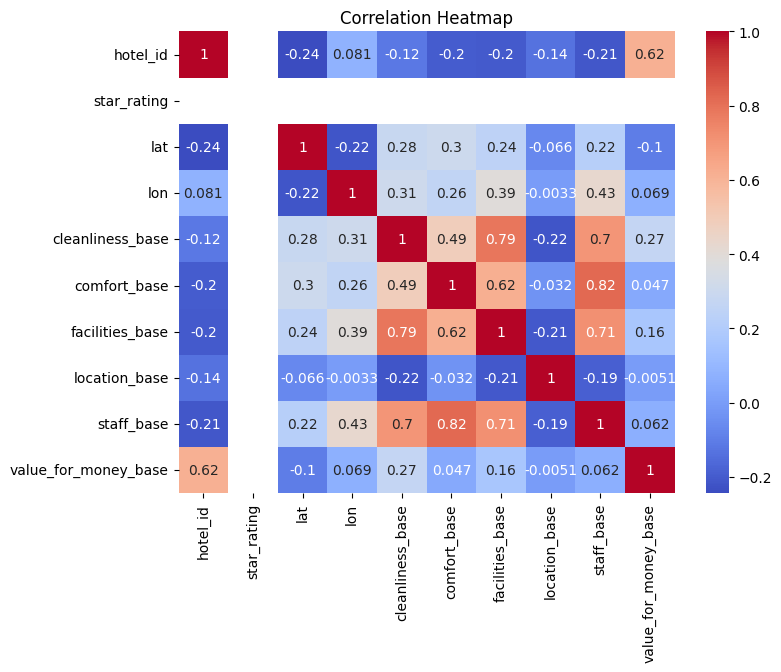

In [39]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(hotels_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### **How Features Affect Our Perceived Value**

*For the purpose of these analyses, we consider perceived value with the constant variable, **value_for_money_base**.*

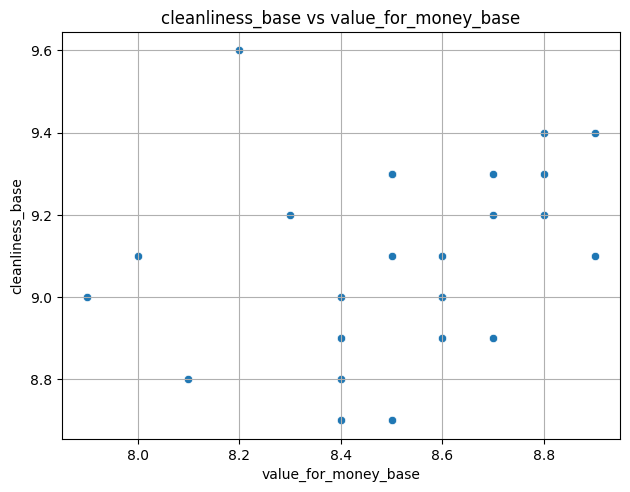

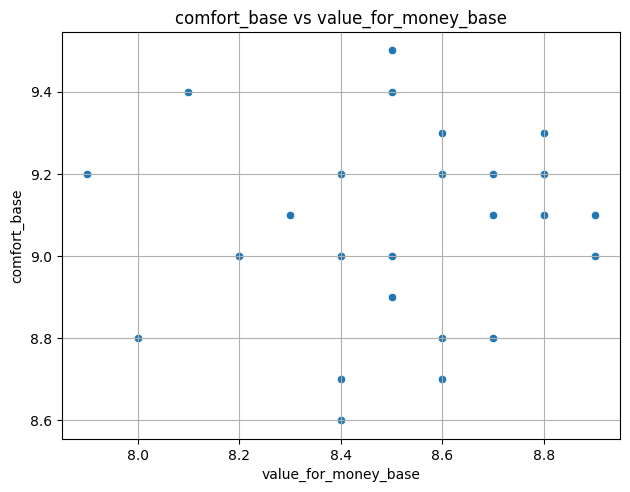

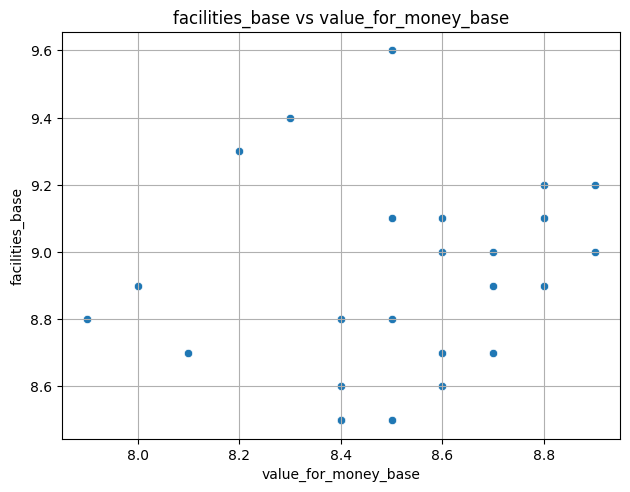

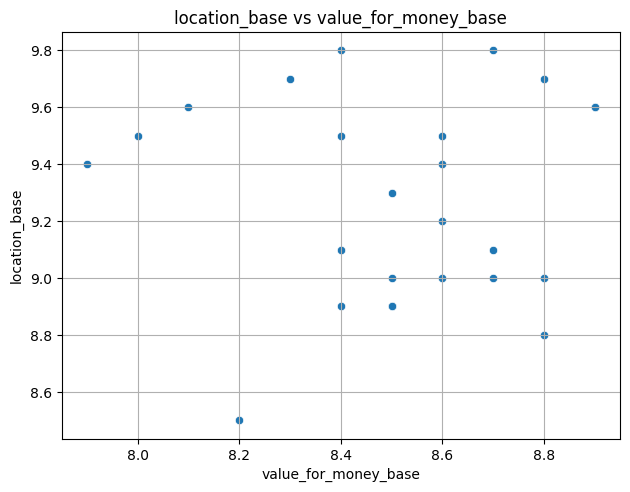

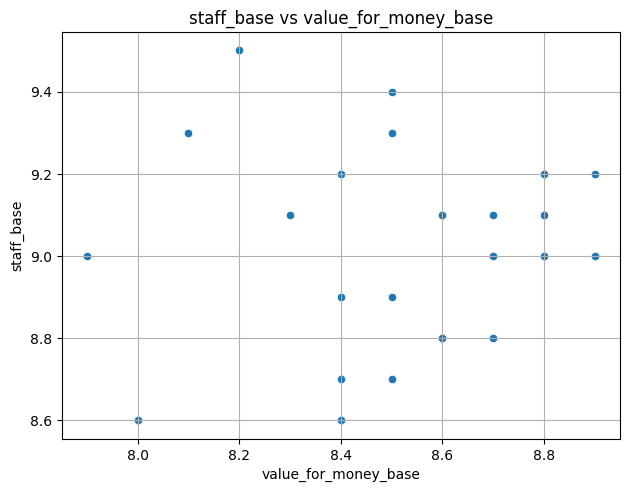

In [40]:
selected_factors = hotels_df.iloc[:, [7, 8, 9, 10, 11]]

for cols in selected_factors:
    sns.scatterplot(y=cols, x=hotels_df['value_for_money_base'], data=hotels_df)
    plt.tight_layout()
    plt.grid()
    plt.title(f"{cols} vs value_for_money_base")
    plt.show()

## **LINEAR REGRESSION**

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from tabulate import tabulate

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance


import scipy.stats as stats

In [42]:
model_features = ["cleanliness_base","comfort_base","facilities_base","location_base","staff_base"]

X= hotels_df[model_features]
y= hotels_df['value_for_money_base']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression().fit(X,y)
model.fit(X_train, y_train)

LinearRegression()

### **Predictions**

*In linear regression, **Mean Squared Error (MSE)** measures the average squared difference between actual values and predicted values.*

In [43]:
# Mean Squared Error

y_prediction = model.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.1965891499704719


*The **R^2 Score**, also known as the **Coefficient of Determination**, measures the proportion of variance in the dependent variable that is predictable from the independent variables*

In [44]:
r_squared = r2_score(y_test, y_prediction)
print(f"Coefficient of Determination/ R2 Score: {r_squared}")

Coefficient of Determination/ R2 Score: -2.366252567987538


*In Scikit-learn, the coefficients and intercept are stored in the model attributes **.coef_** and **.intercept_** after the **.fit()** method has been called.*

In [45]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

                  Coefficient
cleanliness_base     0.907766
comfort_base         0.255738
facilities_base      0.148498
location_base        0.091571
staff_base          -1.149935


### **Cross Validation**

***Cross-validation (CV)** is a resampling technique used in machine learning to evaluate a model's performance on unseen data. By partitioning a single dataset into multiple subsets, it provides a more reliable and less biased estimate of a model's ability to generalize than a simple one-time train-test split.*

*The difference between a **Random Forest Classifier** and a **Random Forest Regressor** is the type of target variable they predict: the classifier handles **categorical** data (labels), while the regressor handles continuous **numerical** data.*

In [46]:
# Initialize model and calculate CV scores

# Passing a fixed integer ensures that the model's training process is reproducible. Every time you run the code with the same integer, you will get the exact same forest and results
rf = RandomForestRegressor(random_state=42)

# 5-fold cross-validation
scores = cross_val_score(rf, X, y, cv=5, scoring='r2') 

# Use Pandas/Numpy to view results
print(f"Cross Validated R2 Scores: {scores}")
print(f"Mean R2 Score: {scores.mean()}")

Cross Validated R2 Scores: [-4.46224057 -1.15210465 -0.51725676  0.13506818  0.19138953]
Mean R2 Score: -1.1610288514510647


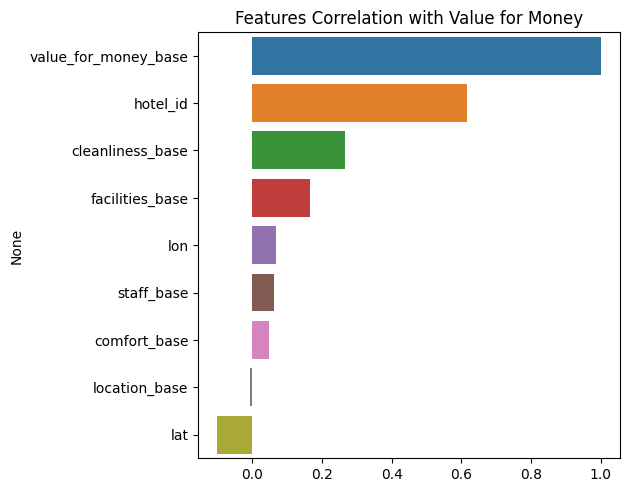

In [47]:
# In Pandas, the .corr() method calculates the statistical relationship between columns in a dataset. It is primarily used during exploratory data analysis to identify patterns, trends, and dependencies between variables.

cols_relationships = hotels_df.drop(columns=['star_rating']).corr(numeric_only=True)['value_for_money_base'].sort_values(ascending=False)
my_palette = sns.color_palette()
sns.barplot(x=cols_relationships.values, 
            y=cols_relationships.index,
            palette=my_palette
           )
plt.tight_layout()
plt.title("Features Correlation with Value for Money")
plt.show()